In [1]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np 

In [2]:
source = mpimg.imread('./cat.jpg')

reference = mpimg.imread('./coffee.jpg')

In [3]:
def calculate_nk(arr):
    count = dict()
    
    for i in range(256):
        count[i] = 0
    
    for i in range(len(arr)):
        for j in range(len(arr[i])):
            count[arr[i,j]] += 1
    
    return count

In [4]:
def calculate_pdf(arr, size):
    pdf = dict()
    
    nk_dict = calculate_nk(arr)
    
    for lev, nk in nk_dict.items():
        pdf[lev] = nk / size
    
    return pdf 

In [5]:
def calculate_cdf(arr):
    
    cdf = dict()
    
    pdf_dict = calculate_pdf(arr, arr.shape[0] * arr.shape[1])
    
    prev = 0.0
    
    for lev, pdf in pdf_dict.items():
        cdf[lev] = prev + pdf
        prev = cdf[lev]
    
    return cdf

In [6]:
def map_levels(src, ref):
    
    src_cdf = calculate_cdf(src)
    
    ref_cdf = calculate_cdf(ref)
    
    lev_dict = dict()
    
    for lev1, cdf1 in src_cdf.items():
        
        min_diff = 99999
        lev_corr_min = None
        
        for lev2, cdf2 in ref_cdf.items():
            if abs(cdf1 - cdf2) < min_diff:
                min_diff = abs(cdf1 - cdf2)
                lev_corr_min = lev2
        lev_dict[lev1] = lev_corr_min
    
    return lev_dict

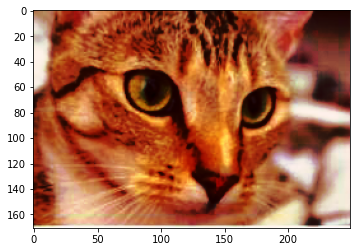

In [7]:
s_r = source[:, :, 0]
s_g = source[:, :, 1]
s_b = source[:, :, 2]

r_r = reference[:, :, 0]
r_g = reference[:, :, 1]
r_b = reference[:, :, 2]


s_r_map = map_levels(s_r, r_r)

s_g_map = map_levels(s_g, r_g)

s_b_map = map_levels(s_b, r_b)

for k in range(3):
    for i in range(len(source)):
        for j in range(len(source[i])):
            if k==0:
                source[i,j,k] = s_r_map[source[i,j,k]]
            elif k==1:
                source[i,j,k] = s_g_map[source[i,j,k]]
            elif k==2:
                source[i,j,k] = s_b_map[source[i,j,k]]

plt.imshow(source)